In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

In [2]:
df_boston = pd.read_csv("boston.csv")
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df_boston = df_boston.drop(columns=["CHAS"])

In [4]:
X_train = df_boston.drop(columns=["MEDV"])[:5].to_numpy()
y_train = df_boston["MEDV"][:5].to_numpy()

In [5]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"ptp X_train: {np.ptp(X_train, axis=0)}\n")
print(f"ptp X_norm: {np.ptp(X_norm, axis=0)}")

ptp X_train: [6.2730e-02 1.8000e+01 4.8900e+00 8.0000e-02 7.6400e-01 3.3100e+01
 1.9722e+00 2.0000e+00 7.4000e+01 3.4000e+00 4.0700e+00 6.2000e+00]

ptp X_norm: [3.07900757 2.5        2.05908043 2.64871622 2.46362211 2.98372124
 2.62473017 2.67261242 2.72886291 2.72707777 2.46069234 2.95371277]


In [6]:
model = SGDRegressor()
model.fit(X_norm, y_train)
model.n_iter_

481

In [7]:
a_norm = model.coef_
b_norm = model.intercept_
print(f"Coeff a: {a_norm}\n")
print(f"Coeff b: {b_norm}")

Coeff a: [ 1.90190883e+00 -1.75041105e-02 -1.58243554e-03 -1.87574697e-02
  2.79309581e+00 -7.00575480e-01  1.92262013e-02  1.94909164e-02
 -1.95360486e-02  1.95144314e-02 -8.41207203e-01 -1.06098915e+00]

Coeff b: [29.68858196]


In [8]:
y_predicted = model.predict(X_norm)
print(f"Real values: {y_train}")
print(f"Predicted values: {y_predicted}")

Real values: [24.  21.6 34.7 33.4 36.2]
Predicted values: [23.67488493 21.48938219 34.14560535 33.62994646 35.50309089]


## Let's try to fit a cosinus

In [50]:
x_cos = np.linspace(0, 10, 10000)
y_cos = np.cos(x_cos)

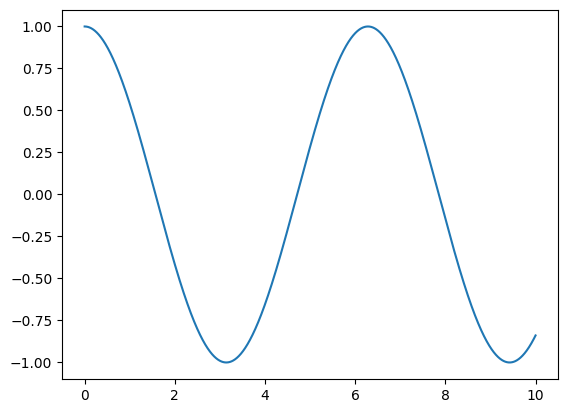

In [51]:
plt.plot(x_cos, y_cos)

In [52]:
X_train = np.c_[x_cos, x_cos**2, x_cos**3, x_cos**4, x_cos**5, x_cos**6, x_cos**7, x_cos**8, x_cos**9, x_cos**10, x_cos**11, x_cos**12, x_cos**13, x_cos**14, x_cos**15, x_cos**16, x_cos**17, x_cos**18, x_cos**19, x_cos**20, x_cos**21, x_cos**22, x_cos**23, x_cos**24, x_cos**25, x_cos**26, x_cos**27, x_cos**28, x_cos**29, x_cos**30]
scaler_cos = StandardScaler()
X_norm = scaler_cos.fit_transform(X_train)

In [54]:
model = SGDRegressor(tol=1e-5)
model.fit(X_norm, y_cos)
model.n_iter_

477

In [55]:
model.coef_

array([-3.70990874,  4.91267529,  3.29430484,  0.15853929, -1.81539751,
       -2.4734022 , -2.27164678, -1.65556891, -0.92701986, -0.25613739,
        0.27832326,  0.65323606,  0.87599326,  0.96861983,  0.95840446,
        0.87273763,  0.736522  ,  0.57108794,  0.39394872,  0.21899402,
        0.05688656, -0.08447113, -0.19947151, -0.28437398, -0.33692895,
       -0.35605739, -0.34158361, -0.29401572, -0.21436772, -0.10401678])

In [57]:
y_predicted = model.predict(X_norm)

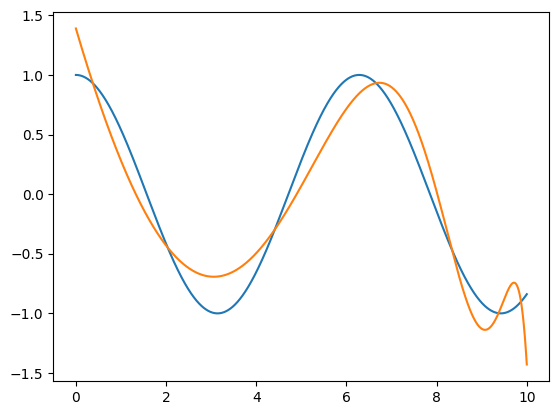

In [58]:
plt.plot(x_cos, y_cos)
plt.plot(x_cos, y_predicted)

Let's see what would be the best fit with this order (13)

In [59]:
def array_coeff_cos(order: int):
    list_coeff = []
    i = 1
    while len(list_coeff) < order:
        list_coeff.append(0)
        if len(list_coeff) < order:
            list_coeff.append((-1)**i/np.math.factorial(2*i))
        i += 1
    return np.array(list_coeff)

In [60]:
coeff = array_coeff_cos(13)
coeff

array([ 0.00000000e+00, -5.00000000e-01,  0.00000000e+00,  4.16666667e-02,
        0.00000000e+00, -1.38888889e-03,  0.00000000e+00,  2.48015873e-05,
        0.00000000e+00, -2.75573192e-07,  0.00000000e+00,  2.08767570e-09,
        0.00000000e+00])

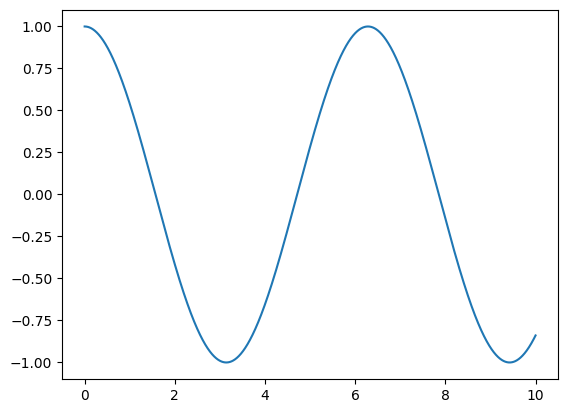

In [61]:
plt.plot(x_cos, y_cos)

In [74]:
def cos_with_poly(x, order):
    somme = 0
    for i in range(order//2):
        somme = np.add(((-1)**i)*x**(2*i)/np.math.factorial(2*i), somme)
    return somme

In [75]:
cos_with_poly(2, 10)

-0.41587301587301595

In [80]:
y_poly = cos_with_poly(x_cos, 26)
y_poly

array([1.0, 0.9999994999000267, 0.9999979996006069, ...,
       -0.6226994018588279, -0.6215955576868946, -0.6204894836003902],
      dtype=object)

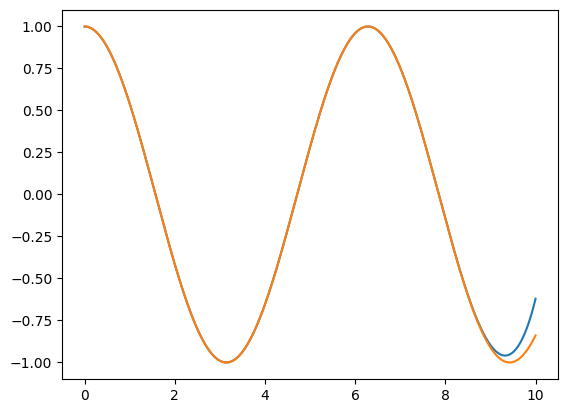

In [79]:
plt.plot(x_cos, cos_with_poly(x_cos, 26))
plt.plot(x_cos, y_cos)